In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import StandardScaler

# Initialize containers
RAW_X = []
Y = []
resize_dim = (112, 112)

# Paths to dataset folders
input_folder = r"C:\Users\princ\Downloads\Vision datasets\archive (1) - Copy\casia dataset\50Classes"

# Iterate over class folders in the dataset
for class_idx, class_folder in enumerate(os.listdir(input_folder)):
    class_path = os.path.join(input_folder, class_folder)
    if os.path.isdir(class_path):
        # Process each image in the class folder
        for filename in os.listdir(class_path):
            # Load the image in RGB
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            resized_image = cv2.resize(image, resize_dim)
            
            # Add to RAW_X and Y
            RAW_X.append(resized_image)
            Y.append(class_idx)




In [3]:
# Convert to numpy arrays
RAW_X = np.array(RAW_X, dtype=np.float32)  # Ensure RAW_X is float32 for scaling
Y = np.array(Y)

# Flatten RAW_X for StandardScaler
num_samples, height, width, channels = RAW_X.shape
RAW_X_flattened = RAW_X.reshape(num_samples, -1)  # Shape: (num_samples, height*width*channels)

# Apply StandardScaler
scaler = StandardScaler()
RAW_X_scaled_flattened = scaler.fit_transform(RAW_X_flattened)

# Reshape back to original image dimensions
X = RAW_X_scaled_flattened.reshape(num_samples, height, width, channels)

# Print the shape and type of X
print("Shape of X:", X.shape)  # Should match RAW_X.shape
print("Type of X:", X.dtype)   # Should be float32
#Compute channel-wise global minimum and maximum
global_min = np.min(X, axis=(0, 1, 2))  # Shape: (3,) -> Min for R, G, B
global_max = np.max(X, axis=(0, 1, 2))  # Shape: (3,) -> Max for R, G, B

# Normalize each channel independently
X_scaled = np.zeros_like(X, dtype=np.float32)
for channel in range(3):
    X_scaled[..., channel] = (X[..., channel] - global_min[channel]) / (global_max[channel] - global_min[channel])

print(f"Global Min (per channel): {global_min}")
print(f"Global Max (per channel): {global_max}")
print("All images are now scaled to the range [0, 1] per channel.")

Shape of X: (5048, 112, 112, 3)
Type of X: float32
Global Min (per channel): [-4.7246256 -3.5890403 -2.8900468]
Global Max (per channel): [3.3063624 4.26454   4.4771414]
All images are now scaled to the range [0, 1] per channel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

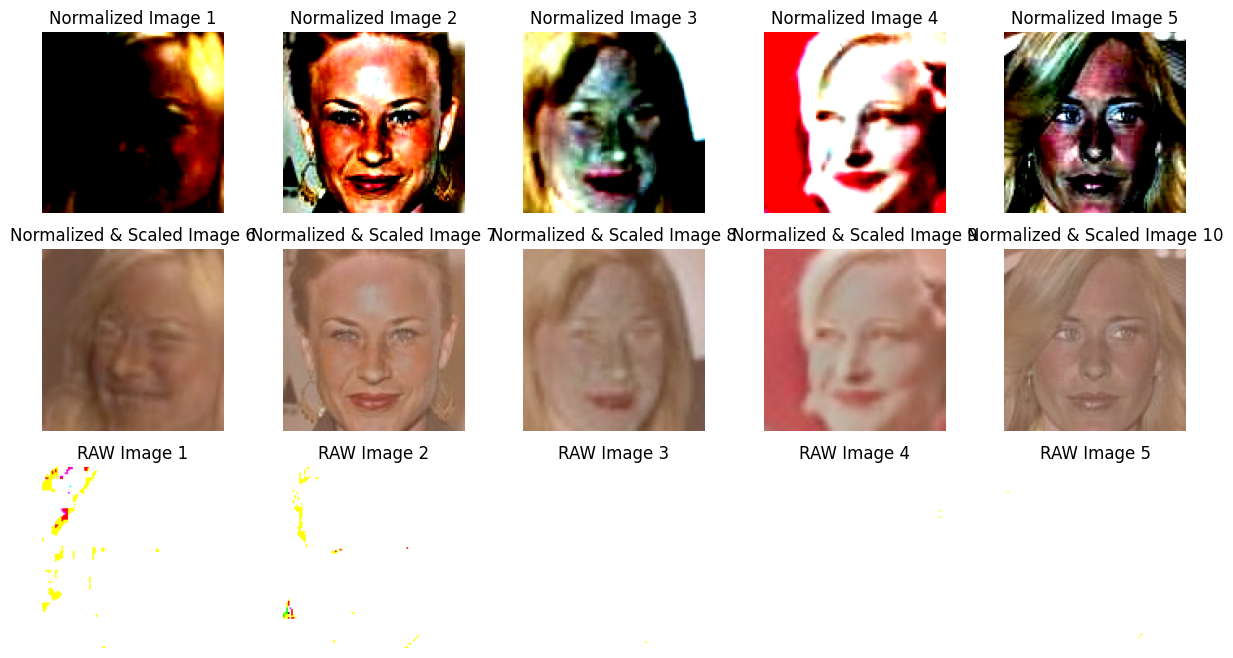

In [4]:
# Plot 5 random images from the X array
plt.figure(figsize=(15, 8))  
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(X[i]) 
    plt.axis('off')  
    plt.title(f"Normalized Image {i+1}")
    
    plt.subplot(3, 5, i+6)  
    plt.imshow(X_scaled[i]) 
    plt.axis('off')  
    plt.title(f"Normalized & Scaled Image {i+6}")
    
    plt.subplot(3, 5, i+11)  
    plt.imshow(RAW_X[i]) 
    plt.axis('off')  
    plt.title(f"RAW Image {i+1}")
plt.show()

In [5]:
X_scaled[0]

array([[[0.57583576, 0.41626045, 0.35929394],
        [0.55785245, 0.4006879 , 0.34131163],
        [0.53776014, 0.38016608, 0.319175  ],
        ...,
        [0.605153  , 0.43498164, 0.30244526],
        [0.62294143, 0.45387572, 0.32582408],
        [0.6523584 , 0.48450097, 0.35875928]],

       [[0.57529515, 0.41562468, 0.3587254 ],
        [0.554202  , 0.39675114, 0.33727264],
        [0.52742326, 0.37430158, 0.31133294],
        ...,
        [0.6165236 , 0.44662976, 0.31434727],
        [0.619244  , 0.4498106 , 0.32130268],
        [0.6357889 , 0.46699348, 0.34013152]],

       [[0.5735045 , 0.4173574 , 0.35885936],
        [0.5490247 , 0.39144406, 0.3317229 ],
        [0.51705277, 0.36356324, 0.2999763 ],
        ...,
        [0.6280707 , 0.45500588, 0.32488152],
        [0.6138715 , 0.44069818, 0.31338233],
        [0.61524934, 0.4422178 , 0.31566045]],

       ...,

       [[0.587508  , 0.4170054 , 0.32723635],
        [0.5895959 , 0.41891947, 0.32966357],
        [0.6055256 , 0

In [6]:
X= np.array(X)
Y= np.array(Y)
# Split the data into 70% training, 15% validation, and 15% testing
X_train_2, X_temp, Y_train_2, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test_2, X_val_2, Y_test_2, Y_val_2 = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, Y, test_size=0.15, random_state=42)



In [7]:
X_train_2[0]

array([[[-0.27179492, -0.17197676,  0.23974498],
        [-0.3241316 , -0.22573414,  0.19173919],
        [-0.29968354, -0.19680277,  0.19253066],
        ...,
        [-0.438607  , -0.1864275 ,  0.34576488],
        [-0.42627043, -0.17300275,  0.3524707 ],
        [-0.43559915, -0.15890087,  0.34980947]],

       [[-0.2637527 , -0.16232179,  0.25291547],
        [-0.31386447, -0.21421878,  0.20692086],
        [-0.2615845 , -0.1574465 ,  0.23660351],
        ...,
        [-0.45896077, -0.204232  ,  0.33221266],
        [-0.44719052, -0.19236127,  0.3383872 ],
        [-0.4552994 , -0.17759983,  0.3365287 ]],

       [[-0.27829507, -0.14845735,  0.29593304],
        [-0.3154149 , -0.18694155,  0.23627083],
        [-0.20981793, -0.06134526,  0.32141623],
        ...,
        [-0.4787947 , -0.22153056,  0.319501  ],
        [-0.46697667, -0.20996608,  0.3249811 ],
        [-0.47703555, -0.19733573,  0.3213192 ]],

       ...,

       [[-0.9154429 , -0.68268615, -0.24295387],
        [-0

In [8]:
#saving the train ,test and validation normalized dataset to be used later 

#np.savez_compressed('X_train_2.npz', X=X_train_2)
#np.savez_compressed('Y_train_2.npz', X=Y_train_2)
#
#np.savez_compressed('X_test_2.npz', X=X_test_2)
#np.savez_compressed('Y_test_2.npz', X=Y_test_2)
#
#np.savez_compressed('X_val_2.npz', X=X_val_2)
#np.savez_compressed('Y_val_2.npz', X=Y_val_2)
#
#np.savez_compressed('X_train_3.npz', X=X_train_3)
#np.savez_compressed('Y_train_3.npz', X=Y_train_3)
#
#np.savez_compressed('X_test_3.npz', X=X_test_3)
#np.savez_compressed('Y_test_3.npz', X=Y_test_3)
